<a href="https://colab.research.google.com/github/Nisjain120/Projects/blob/main/Nischay_Jain_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

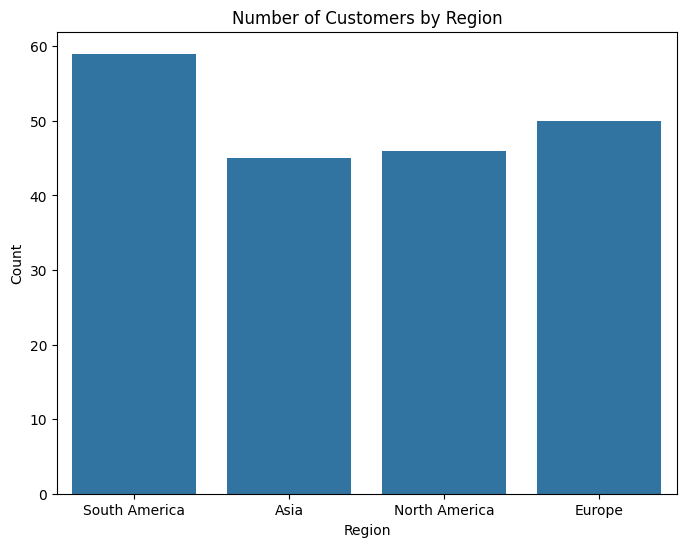

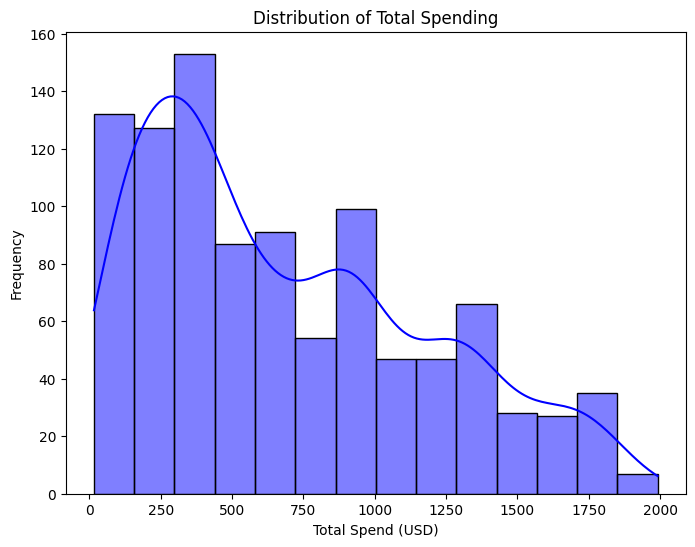

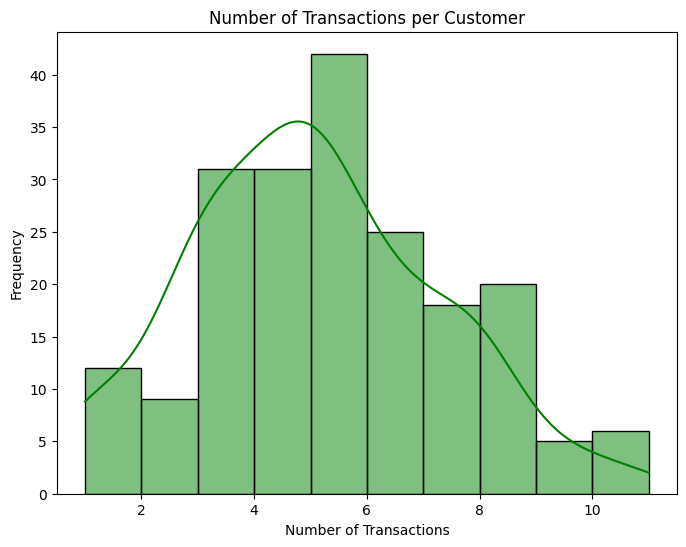

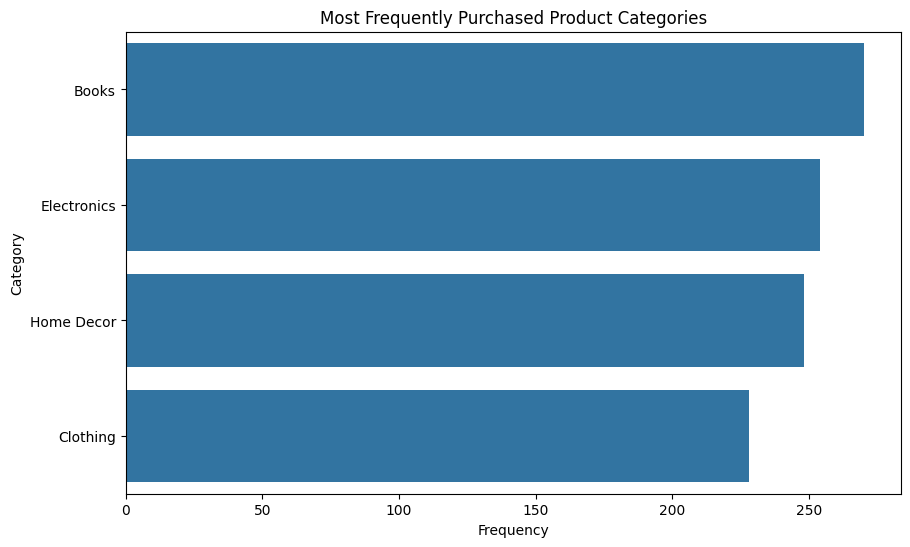

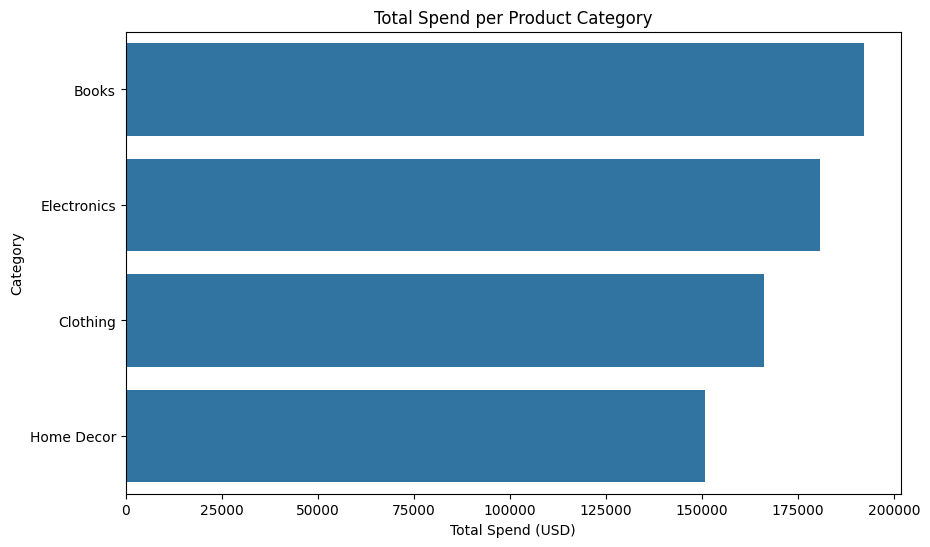

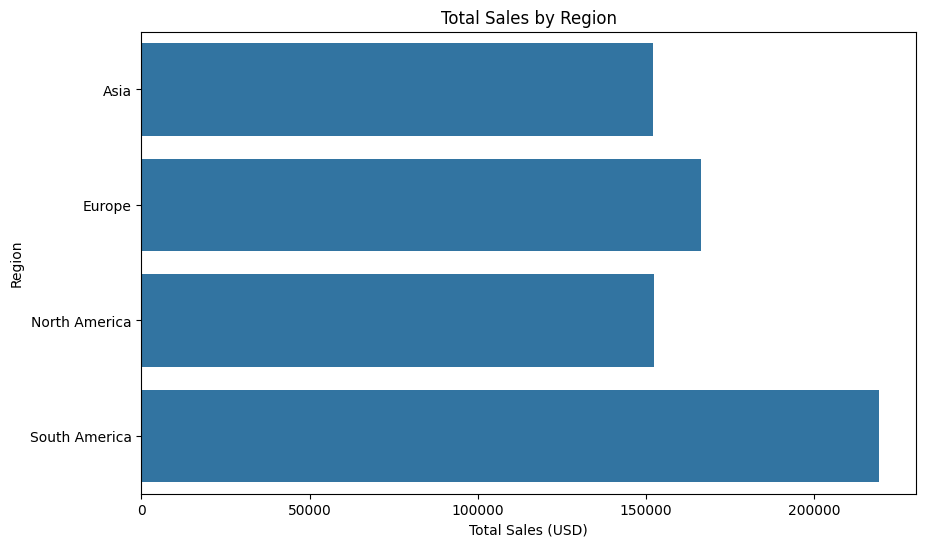

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

# Inspect the first few rows of the dataset
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

# Check for missing values
print("Missing values in Customers dataset:")
print(customers_df.isnull().sum())

print("Missing values in Products dataset:")
print(products_df.isnull().sum())

print("Missing values in Transactions dataset:")
print(transactions_df.isnull().sum())

# Summary statistics for numerical features in the Customers dataset
print(customers_df.describe())

# Merge customer and transaction data
customer_transactions = transactions_df.merge(customers_df[['CustomerID', 'Region', 'CustomerName']], on='CustomerID', how='left')

# Merge product data to get product categories
customer_transactions = customer_transactions.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')

# Visualize the distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=customers_df)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Total spending distribution
plt.figure(figsize=(8, 6))
sns.histplot(transactions_df['TotalValue'], kde=True, color='blue')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Frequency')
plt.show()

# Transactions per customer
transactions_per_customer = transactions_df.groupby('CustomerID')['TransactionID'].nunique().reset_index()
transactions_per_customer.columns = ['CustomerID', 'NumTransactions']

# Merging with customer profile
customer_profile = customers_df.merge(transactions_per_customer, on='CustomerID', how='left')

plt.figure(figsize=(8, 6))
sns.histplot(customer_profile['NumTransactions'], kde=True, color='green')
plt.title('Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# Most frequently purchased product categories
category_counts = customer_transactions['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Category', data=category_counts)
plt.title('Most Frequently Purchased Product Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

# Total spend by product category
total_spend_per_category = customer_transactions.groupby('Category')['TotalValue'].sum().reset_index()
total_spend_per_category = total_spend_per_category.sort_values('TotalValue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Category', data=total_spend_per_category)
plt.title('Total Spend per Product Category')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Category')
plt.show()

# Transaction frequency per region
total_sales_per_region = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID') \
                                        .groupby('Region')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='Region', data=total_sales_per_region)
plt.title('Total Sales by Region')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Region')
plt.show()
